<a href="https://colab.research.google.com/github/nahumsa/Self-Avoiding-Walks/blob/master/SAW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Avoiding Walks

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Counting Self-Avoiding Walks

In [60]:
class SAW():

  def __init__(self,N, initial_x=0, initial_y=0):
    self.grid = self._grid(N)
    self.k = []

    # Initial Value
    self.x = [initial_x]
    self.y = [initial_y]
    
    
    self.n_walks = self._evolution()    

  def _evolution(self, plot=False, debug=False):
    """ Makes the evolution of the SAW.

    Parameters 
    -----------------------------------
    plot (bool): True if you want to plot. (default=False)
    debug (bool): True if you want to debug. (default=False)


    Outputs
    -----------------------------------
    (int): number of steps. 


    """
    # Set initial values    
    initial = (self.x[0],self.y[0])
    n_steps = 0
    colide = False

    # Do the first walk    
    possible_walks,possible_values = self._check_walks(self.grid,*initial)  
    
    # Log possible walks
    self.k.append(len(possible_walks))  
    
    direction = self._choose_uniformly(possible_walks)    
    i,j = self._walk(self.grid, *initial, direction, debug=debug)
    self.x.append(i)
    self.y.append(j)
    
    n_steps += 1
    

    while not colide:
      possible_walks, possible_values = self._check_walks(self.grid, i, j)
      
      # Log possible walks
      self.k.append(len(possible_walks))  

      # Check if there is no possible ways to walk 
      # if this is the case then the walker colided and it is terminated
      
      if len(possible_walks) == 0:
        colide = True
        
        # Exclude last value because it is 0
        self.k.pop(-1)
        
        break

      direction = self._choose_uniformly(possible_walks)    
      i,j = self._walk(self.grid, i, j, direction, debug=debug)      
      self.x.append(i)
      self.y.append(j)
      
      n_steps += 1            
      
      if plot:
        plt.imshow(self.grid)
        plt.show()
    
    return n_steps

  @property
  def number_of_walks(self):
    """ Returns the number of walks of the walker.

    """
    return self.n_walks  

  @property
  def trial_probability(self):
    """ Return the log of possible walks.

    """
    g = (1/np.array(self.k)).cumprod()
    return g[-1]

  def _grid(self, N: int):
    """ Creates a NxN grid.

    Parameters 
    -----------------------------------

    N (int): Lenght of the size of the grid.


    Outputs
    -----------------------------------
    (np.array): NxN grid


    """
    return np.zeros((N,N))

  def _choose_uniformly(self, x: list):
    """ Chooses uniformly a random value from an array.

    Parameters
    -----------------------------------
    x (array): Array that you want to choose a value uniformly.


    Output
    -------------------------------------
    (int or float): Value chosen from the array.

    """
    n = len(x)
    index = 0
    if n > 1:
      index = np.random.randint(0,high=n)     
    return x[index]

  def _walk(self, matrix: np.array
               ,i: int,j: int
               ,direction: int, debug=False):
    """ Walk on the grid, here we put a value for the direction:
        1: Left
        2: Right
        3: Up
        4: Down
    

    Parameters
    -----------------------------------
    matrix (np.array): Grid that you wand to walk.
    i (int): Y index of the array.
    j (int): X index of the array.
    direction (int): Direction of the step.
    debug (boolean): True if you want to debug the function.
                     (Default=False).    

    """
    # Check if it passes the lenght of the array
    if i == len(matrix) or j == len(matrix):
      print('Error')
      return None, None
    
    # Check if it is going left
    elif direction == 1:
      if debug:
        print('Left')
      matrix[i,j] = direction
      return i,j-1
    
    # Check if it is going right
    elif direction == 2:
      if debug:
        print('Right')
      matrix[i, j] = direction
      return i,j+1
    
    # Check if it is going up
    elif direction == 3:
      if debug:
        print('Up')
      matrix[i, j] = direction
      return i-1,j

    # Check if it is going down
    elif direction == 4:
      if debug:
        print('Down')
      matrix[i, j] = direction
      return i+1,j

  def _check_walks(self, matrix,i,j):
    """ Check possible walks on position i,j.
    

    Parameters
    -----------------------------------
    matrix (np.array): Grid that you wand to walk.
    i (int): Y index of the array.
    j (int): X index of the array.
    
    Output
    -----------------------------------
    (dict): Dictionary with possible walks, keys are directions
            1,2,3,4 and values are indices associated with each
            direction.

    """
    possible_walks = {1:(i,j-1), 
                      2:(i,j+1), 
                      3:(i-1,j), 
                      4:(i+1,j)}
    # Create a list for all directions that are not possible
    impossible_walks = []

    # See impossible walks
    for key, indexes in zip(possible_walks,possible_walks.values()):
      try:
        if matrix[indexes] != 0 or indexes[0] < 0 or indexes[1] < 0:
          impossible_walks.append(key)
      except:
        impossible_walks.append(key)

    # Delete from the dict all impossible walks
    for delete in impossible_walks:
      possible_walks.pop(delete)
    
    # Return all possible walks and all indices
    return list(possible_walks.keys()), list(possible_walks.values())

from tqdm.notebook import tqdm


def SAW_montecarlo(N: int,
                   samples: int,
                   verbose=True):
  
  assert type(samples) == int, "Number of samples must be int."
  
  samples = int(samples)
  
  number_steps = []
  trial_prob = []
  data = {}
  if verbose:
    range_samples = tqdm(range(int(samples)))
  
  else:
    range_samples = range(int(samples))

  for _ in range_samples:
    saw = SAW(N)
    number_steps.append(saw.number_of_walks)
    trial_prob.append(saw.trial_probability)    
    data.update({saw.number_of_walks: 1/saw.trial_probability})
  
  # Transforms into np.array
  trial_prob = np.array(trial_prob)
  number_steps = np.array(number_steps)

  
  
  return number_steps, trial_prob, data

In [67]:
n_samples = 10000000
n_lenght = 10

n_steps, t_prob, data = SAW_montecarlo(n_lenght, n_samples)

In [90]:
aux_t = []

a = 0

for i in range(max(n_steps)+1):
  if np.sum(n_steps==i) != 0:
    aux_t.append(np.sum(1/t_prob[n_steps == i])/np.sum(n_steps==i))

  else:
    aux_t.append(0.)
  a += np.sum(n_steps==i)

# Convert nan to number
aux_t = np.nan_to_num(aux_t) 
print(f"Did I count all samples? {a == n_samples}")
print(f"Estimated number of SAWs: {np.sum(aux_t)}")

Did I count all samples? True
Estimated number of SAWs: 3.4593673416375267e+24


In [ ]:
import seaborn as sns

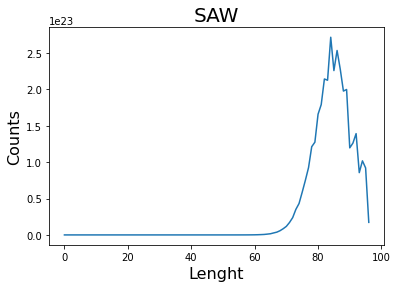

In [96]:
plt.plot(aux_t)
plt.title('SAW', size=20)
plt.xlabel('Lenght', size=16)
plt.ylabel('Counts', size=16)
plt.show()

In [104]:
np.savetxt('SAW1.txt', aux_t)

## 1.2) Early Termination

In [ ]:
class SAWEarly(SAW):
  def __init__(self,N, initial_x=0, initial_y=0, terminate_probability=0.1):
    
    self.terminate_probability = terminate_probability
    super(SAWEarly, self).__init__(N,initial_x,initial_y)
        

  def _evolution(self, plot=False, debug=False):
    """ Makes the evolution of the SAW.

    Parameters 
    -----------------------------------
    plot (bool): True if you want to plot. (default=False)
    debug (bool): True if you want to debug. (default=False)


    Outputs
    -----------------------------------
    (int): number of steps. 


    """
    # Set initial values    
    initial = (self.x[0],self.y[0])
    n_steps = 0
    colide = False

    # Do the first walk    
    possible_walks,possible_values = self._check_walks(self.grid,*initial)  
    

    # Log possible walks
    self.k.append(len(possible_walks))  
    
    if np.random.uniform() < self.terminate_probability:
      colide = True

    direction = self._choose_uniformly(possible_walks)    
    i,j = self._walk(self.grid, *initial, direction, debug=debug)
    self.x.append(i)
    self.y.append(j)
    
    n_steps += 1
    

    while not colide:
      possible_walks, possible_values = self._check_walks(self.grid, i, j)
      
      # Log possible walks
      self.k.append(len(possible_walks))  

      # Check if there is no possible ways to walk 
      # if this is the case then the walker colided and it is terminated
      if np.random.uniform() < self.terminate_probability:
        
        colide = True
        if len(possible_walks) == 0:
          self.k.pop(-1)    
        break

      if len(possible_walks) == 0:
        colide = True
        
        # Exclude last value because it is 0
        self.k.pop(-1)
        
        break

      direction = self._choose_uniformly(possible_walks)    
      i,j = self._walk(self.grid, i, j, direction, debug=debug)      
      self.x.append(i)
      self.y.append(j)
      
      n_steps += 1            
      
      if plot:
        plt.imshow(self.grid)
        plt.show()
    
    return n_steps

def SAWEarly_montecarlo(N: int,
                        samples: int,
                        verbose=True):
  
  assert type(samples) == int, "Number of samples must be int."
  
  samples = int(samples)
  
  number_steps = []
  trial_prob = []
  data = {}
  if verbose:
    range_samples = tqdm(range(int(samples)))
  
  else:
    range_samples = range(int(samples))

  for _ in range_samples:
    saw = SAWEarly(N)
    number_steps.append(saw.number_of_walks)
    trial_prob.append(saw.trial_probability)    
    data.update({saw.number_of_walks: 1/saw.trial_probability})
  
  # Transforms into np.array
  trial_prob = np.array(trial_prob)
  number_steps = np.array(number_steps)

  
  
  return number_steps, trial_prob, data

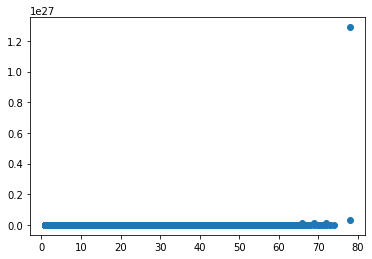

In [ ]:
n_samples = 1000000
n_lenght = 10

n_steps, t_prob, data = SAWEarly_montecarlo(n_lenght, n_samples)

plt.plot(n_steps, 1/t_prob, 'o')
plt.show()

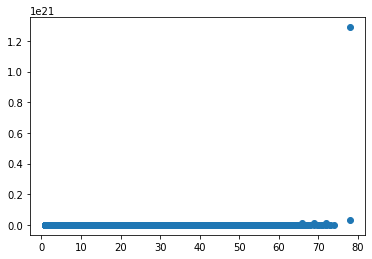

In [ ]:
plt.plot(n_steps, 1/t_prob/n_samples, 'o')
plt.show()

In [ ]:
np.sum(1/t_prob/n_samples)

1.36707293234189e+21

## 1.3) Favor long walks

--------------------------------------------------------------

To-Do:

- [ ] Keep x, y for future plot.
- [ ] Apply parallel processing, [website](https://www.machinelearningplus.com/python/parallel-processing-python/).

Making parallel

In [ ]:
import numpy as np
from time import time

# Prepare data
np.random.RandomState(100)
arr = np.random.randint(0, 10, size=[200000, 5])
data = arr.tolist()
data[:5]

def howmany_within_range(row, minimum, maximum):
    """Returns how many numbers lie within `maximum` and `minimum` in a given `row`"""
    count = 0
    for n in row:
        if minimum <= n <= maximum:
            count = count + 1
    return count

[[7, 7, 3, 6, 2],
 [4, 2, 9, 3, 2],
 [5, 6, 8, 0, 4],
 [3, 6, 2, 5, 8],
 [6, 2, 5, 1, 3]]

In [ ]:

start_time = time()

results = []
for row in data:
    results.append(howmany_within_range(row, minimum=4, maximum=8))

print(results[:10])
print(f"--- {time() - start_time} seconds ---")
#> [3, 1, 4, 4, 4, 2, 1, 1, 3, 3]

[3, 1, 4, 3, 2, 2, 2, 1, 2, 2]
--- 0.13414549827575684 seconds ---


In [ ]:
import multiprocessing as mp

start_time = time()
print("Number of processors: ", mp.cpu_count())

# Parallelizing using Pool.apply()

# Step 1: Init multiprocessing.Pool()
pool = mp.Pool(mp.cpu_count())

# Step 2: `pool.apply` the `howmany_within_range()`
results = [pool.apply(howmany_within_range, args=(row, 4, 8)) for row in data]

# Step 3: Don't forget to close
pool.close()    

print(results[:10])
print(f"--- {time() - start_time} seconds ---")
#> [3, 1, 4, 4, 4, 2, 1, 1, 3, 3]

Number of processors:  2
[3, 1, 4, 3, 2, 2, 2, 1, 2, 2]
--- 40.883756160736084 seconds ---


# 2) Self-Avoiding Walks without a grid restriction

In [105]:
def SAW(N):
  
  def choose_uniformly(x):
    """Uniform sample from an array.

    Parameters
    -----------------------------------
    x(array): Array that you want to uniformly sample.

    Outputs
    -----------------------------------
    (int): Value sampled.
    """
    n = len(x)
    index = np.random.randint(0,high=n)
    return x[index]
  
  x, y = [0], [0]
  positions_walked = set([(x[0],y[0])])
  is_stuck = False
  k_j = []
  for i in range(N):
    stencil = [(1,0), (0,1), (-1,0), (0,-1)]
    possible_steps = []
    # Check possible steps on the stencil
    for dx, dy in stencil:
      if (x[-1] + dx, y[-1] + dy) not in positions_walked:
        possible_steps.append((dx,dy))
    
    # Keep the number of possible choices for each step
    k_j.append(len(possible_steps))

    # Check if there is any possible step
    if possible_steps:
      dx, dy = choose_uniformly(possible_steps)
      positions_walked.add((x[-1] + dx, y[-1] + dy))
      x.append(x[-1] + dx)
      y.append(y[-1] + dy)
    # If there is no possible step, it is stuck
    else:
      is_stuck = True
      steps_walked = i+1
      break

    steps_walked = N+1
  
  
  return x, y, is_stuck, steps_walked

Is stuck? True
24


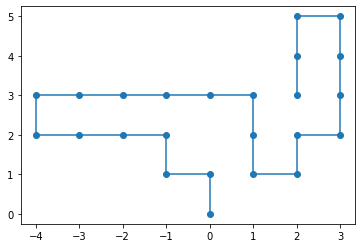

In [106]:
x,y, is_stuck, steps_walked = SAW(100)
print("Is stuck?", is_stuck)
print(steps_walked)
plt.plot(x,y, 'o-')
plt.show()